# Linear Regression Model using Python - ML - Advertising


## Importing Libraries:

In [1]:
# import numpy, pandas, matplotlib, seaborn, statsmodels, and sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


## Data:

In [2]:
media = pd.read_csv(r"C:\Users\USP\Desktop\MFE Summer Assignments\Linear Regression Modeling ML\Data\Company_data.csv")
print(media.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


## Understanding the Data:

In [3]:
# shape, info, and description

print(media.shape)

media.info()

media.describe()


(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualization:

This is the relation between different media streams with Sales: 
 


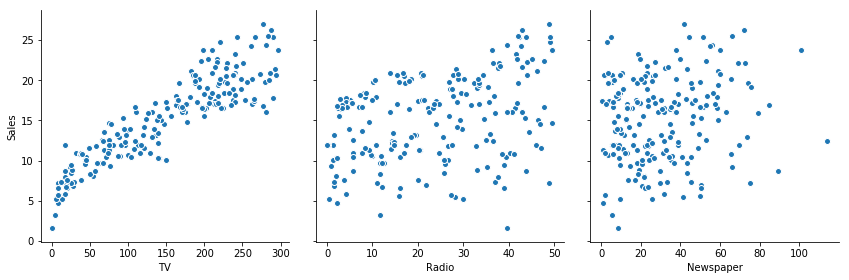

In [4]:
# importing as above seaborn and matplotlib for data visualisation and understanding patterns:

# for data correlation we will use pairplot

sns.pairplot(media, x_vars = ["TV", "Radio", "Newspaper"], y_vars = "Sales", size = 4, aspect = 1, kind = "scatter")
print("This is the relation between different media streams with Sales: \n ")
plt.show()

## Linear Regression:

In [5]:
# we will perform the linear regression using the following steps: creating X and Y, creating Train and Test data, Training the data, and finally evaluating the model.


# our first independent variable will be "TV"
# dependent variable, Y

# creating X and Y:

X = media["TV"]
y = media["Sales"]


### Splitting Data:

In [6]:
# Splitting data betweeen train and test data:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train)

print(y_train)


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
57     136.2
44      25.1
148     38.0
160    172.5
89     109.8
146    240.1
199    232.1
10      66.1
20     218.4
165    234.5
12      23.8
16      67.8
101    296.4
120    141.3
45     175.1
142    220.5
117     76.4
184    253.8
187    191.1
183    287.6
       ...  
129     59.6
159    131.7
132      8.4
108     13.1
155      4.1
130      0.7
86      76.3
93     250.9
137    273.7
144     96.2
58     210.8
60      53.5
107     90.4
143    104.6
198    283.6
34      95.7
14     204.1
66      31.5
53     182.6
98     289.7
180    156.6
94     107.4
138     43.0
176    248.4
79     116.0
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64
74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
127    11.9
81     17.3
88     12.9
119     6.6
110    18.4
57     13.2
44      8.5
148    10.9
160    16.4
8

### Constructing and Training the model:

In [7]:
# importing statsmodels package to perform the linear regression
# we need to add constant c, as we have an intercept

X_train_sm = sm.add_constant(X_train)

X_train_sm



,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
127,1.0,80.2
81,1.0,239.8
88,1.0,88.3
119,1.0,19.4
110,1.0,225.8


In [8]:
# fitting the model, regressing Sales on TV:

model = sm.OLS(y_train, X_train_sm)

results = model.fit()

print(results.params)

results.summary()


const    6.948683
TV       0.054546
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.52e-52
Time:                        14:40:03   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
1- The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2- R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.
3- Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

### Plotting:

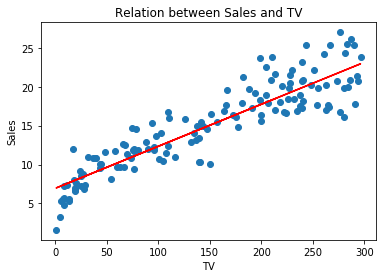

In [9]:
# Visualing the fitting line

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, "r" )
plt.title("Relation between Sales and TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()


### Residual Analysis:

In [10]:
# Error = Actual y value - y predicated value

y_train_pred = results.predict(X_train_sm)

# residual

rs = (y_train - y_train_pred)

rs

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
127    0.576747
81    -2.728755
88     1.134927
119   -1.406871
110   -0.865114
57    -1.177815
44     0.182218
148    1.878578
160    0.042174
89     3.762193
146   -1.845118
199   -1.208752
10     2.045843
20    -0.861476
165   -2.839662
12     0.953128
16     1.853115
101    0.683956
120    0.844002
45    -0.399645
142    1.123978
117   -1.715979
184   -3.192395
187   -0.072377
183    3.563958
         ...   
129   -0.499610
159   -1.232359
132   -1.706868
108   -2.363233
155   -3.972321
130   -5.386865
86     0.889476
93     1.565787
137   -1.077856
144    0.104015
58     5.353072
60    -1.766881
107    0.120381
143   -2.254169
198    3.082141
34    -0.268712
14     0.918529
66     2.333126
53     4.291262
98     2.649412
180    0.009452
94    -1.306897
138    0.305849
176   -0.297848
79    -2.275991
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: floa

C:\Users\USP\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


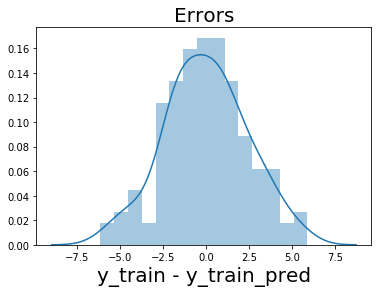

In [11]:
# Plotting the residuals:

fg = plt.figure()
sns.distplot(rs, bins = 15)
plt.title("Errors", fontsize = 20)
plt.xlabel("y_train - y_train_pred", fontsize = 20)
plt.show()

Analysis:
1- The residuals are following the normal distribution graph with a mean 0.

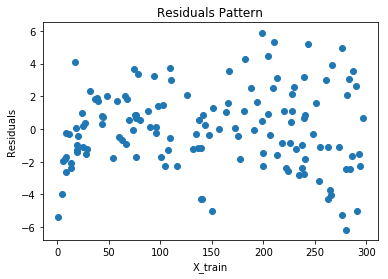

In [12]:
# plotting residuals patterns:

plt.scatter(X_train, rs)
plt.title("Residuals Pattern")
plt.xlabel("X_train")
plt.ylabel("Residuals")
plt.show()

### Evaluating the model through Test data:

In [13]:
# adding a constant to the test data, as we did for the train data

X_test_sm = sm.add_constant(X_test)

# predicting the Y_test

y_test_pred = results.predict(X_test_sm)

y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [14]:
# we imported the R2
# checking for the R2

r_square = r2_score(y_test, y_test_pred)

round(r_square, 4)

0.7921

Analysis:
If we can remember from the training data, the R² value = 0.815
Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.  

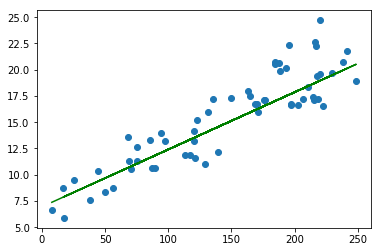

In [15]:
# plotting y_test and X_test

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, "g")
plt.show()
